# SYRIATEL CUSTOMER CHURN PREDICTION: A SUPERVISED LEARNING APPROACH.

PROJECT BY: Kelvin Kipyegon Rotich

## INTRODUCTION

Welcome to this project on predicting customer churn at SyriaTel, a telecommunications company based in the United States. In this project, we will be focused on supervised learning algorithms and choose the best one which will predict whether a customer will churn or not. This is based on a comprehensive dataset which contains several factors which may or may not influence a customer to stop using SyriaTel as its telecommunications service provider.

The main purpose of this project is to create a predictive model that accurately classifies whether a customer will churn or not. This project aims to provide insights to SyriaTel stakeholders and in turn they will make informed decisions which will mitigate customer churn effects in the company revenue.

In the following sections we will delve into the project's methodology, key findings and the models' performance in predicting customer churn.



## PROJECT OVERVIEW

### Telecommunications industry background in the USA.

The telecommunication industry in the United States has evolved significantly over the years, playong a pivotal role in shaping the nation's communication landscape. Ever since the first telegraph was created in the mid 19th century, the industry has been witness to a continous series of technological advancements. 

The advent of the telephone services in the late 1800s marked a transformative era. The mid-20th century saw the rise of microwave and satelite technologies which facilitated long-distance communication. The divestiture of AT&T in 1984 led to increased competition, paving the way for creation of new telecommunication companies in the United States.

The late 20th century and early 21st century saw the proliferation of mobile communications, with the emergence of wireless networks and the widespread adoption of smartphones. This period also saw the expansion of broadband internet services, enabling high-speed data transformations.

Regulatory changes, like the Telecommunications Act of 1996, aimed to foster competition and innovation by breaking down monopolistic structures. As a result, numerous players like SyriaTel entered the market, offering diverse services ranging from traditional landline telephone to broadband internet, cable television and mobile services.

Today, the U.S. Telecommunications industry continues to be dynamic, with ongoing advancements in 5G technology, fiber-optic networks, and the convergence of services. Major companies in the industry have played central roles, contributing to the nation's connectivity and driving innovation in communication technologies.

### Problem Statement.

SyriaTel is grappling with the issue of customer churn. Despite offering a range of services, the company is experiencing a significant increase in customer attrition, leading to a decline in overall revenue and customer satisfaction and all because of customer churn. The company seeks to proactively predict customer churn, allowing for targeted retention strategies and ultimately reducing customer attrition rates to enhance overall long-term business sustainability in the dynamic telecommunications industry. 

### Objectives.

1. To investigate each feature and check for patterns. This will help in identifying features to be used in creating the models. It will also help in identifying distributions of numerical features and count the unique values in each feature for categorical features.
2. To investigate the relationship between the feature variables and the target variable. This will try to identify the patterns that may lead to customer churn. This will also help in filtering some of the features to be used in modelling.
3. To check the relationship between numerical features. This will determine the models to be used for this project.
4. To create a precise model that will be used to predict customer churn depending on a range of features.

### Importing the necessary libraries

In [1]:
# Importing libraries.

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_recall_curve, roc_curve, auc, precision_score, recall_score, accuracy_score, f1_score

## DATA UNDERSTANDING.

In [9]:
# Function to load and examine the data

def load_and_examine_data(file_path):
    try:
        # Load the data from the specified file path
        data = pd.read_csv(file_path)

        # Display the shape, columns and the first few rows of the dataset
        print("----------------------------Details about the data----------------------------\n")
        print("----------------------------Shape of the dataset----------------------------\n")
        display(data.shape)
        print()
        print("----------------------------Columns of the dataset----------------------------\n")
        display(data.columns)
        print()
        print("----------------------------Head of the dataset----------------------------\n")
        display(data.head())
        print()
        # Display information about the dataset
        print("\n----------------------------Data information ----------------------------\n")
        display(data.info())
        print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
        display(data.describe())

        return data

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Replace with your data file path
file_path = "customer_churn.csv" 
data = load_and_examine_data(file_path)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(3333, 21)


----------------------------Columns of the dataset----------------------------



Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')


----------------------------Head of the dataset----------------------------



,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minu

None


----------------------------Descriptive Statistics of the dataset ----------------------------



,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The dataset contains customers of SyriaTel and their information including whether they have churned or not. It contains 21 columns with 3333 entries.

Additional column information:

* `state`(object): The state where the customer comes from.
* `account length`(int): The number of months the customer has stayed with SyriaTel.
* `area code`(int): The telephone area code the customer lives in.
* `phone number`(object): The customer's phone number.
* `international plan`(object): Whether the customer has an international plan or not.
* `voice mail plan`(object): Whether the customer has a voicemail plan or not.
* `number vmail messages`(int): The number of voicemail messages the customer has.
* `total day minutes`(float): The number of minutes the customer spends on calls during the day.
* `total day calls`(int): The number of calls the customer makes during the day.
* `total day charge`(float): The amount the customer is charged from calls during the day.
* `total eve minutes`(float): The number of minutes the customer spends on calls in the evening.
* `total eve calls`(int): The number of calls the customer makes in the evening.
* `total eve charge`(float): The amount the customer is charged from calls in the evening.
* `total night minutes`(float): The number of minutes the customer spends on calls at night.
* `total night calls`(int): The number of calls the customer makes at night.
* `total night charge`(float): The amount the customer is charged from calls at night.
* `total intl minutes`(float): The number of minutes the customer spends on international calls.
* `total intl calls`(int): The number of international calls the customer makes.
* `total intl charge`(float): The amount the customer is charged from international calls.
* `customer service calls`(int): The number of customer service calls the customer has ever made.
* `churn`(bool): Whether the customer has churned or not.


## DATA PREPARATION

### Checking for missing, duplicated and placeholder values.

We will begin the data cleaning by checking for missing, duplicated and placeholder values in the dataset. One function will be used to check for them.

In [3]:
# Creating a function that returns null, duplicated and placeholder values in the dataset.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)
    

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

-------------------------Duplicated Values Check------------------------------------



Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'state'
Placeholders found: []
Count of placeholders: 0

Column: 'account length'
Placeholders found: []
Count of placeholders: 0

Column: 'area code'
Placeholders found: []
Count of placeholders: 0

Column: 'phone number'
Placeholders found: []
Count of placeholders: 0

Column: 'international plan'
Placeholders found: []
Count of placeholders: 0

Column: 'voice mail plan'
Placeholders found: []
Count of placeholders: 0

Column: 'number vmail messages'
Placeholders found: []
Count of placeholders: 0

Column: 'total day minutes'
Placeholders found: []
Count of placeholders: 0

Column: 'total day calls'
Placeholders found: []
Count of placeholders: 0

Column: 'total day charge'
Placeholders found: []
Count of placeholders: 0

Column: 'total eve minutes'
Placeholders found: []
Count of placeholders: 0

Column: 'total eve calls'
Placeholders found: []

Based on the above, it can be seen that our dataset has no null, duplicated and placeholder values. We will now go ahead and check on the outliers.

### Outliers

We will now check the outliers in the dataset. This will be done with the use of a function and boxplots.

In [4]:
# Creating a function that checks for outliers in the dataset.
def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr

        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data.select_dtypes(include = ['number'])
check_outliers(data, columns_to_check)

account length
Number of outliers: 18

area code
Number of outliers: 0

number vmail messages
Number of outliers: 1

total day minutes
Number of outliers: 25

total day calls
Number of outliers: 23

total day charge
Number of outliers: 25

total eve minutes
Number of outliers: 24

total eve calls
Number of outliers: 20

total eve charge
Number of outliers: 24

total night minutes
Number of outliers: 30

total night calls
Number of outliers: 22

total night charge
Number of outliers: 30

total intl minutes
Number of outliers: 46

total intl calls
Number of outliers: 78

total intl charge
Number of outliers: 49

customer service calls
Number of outliers: 267



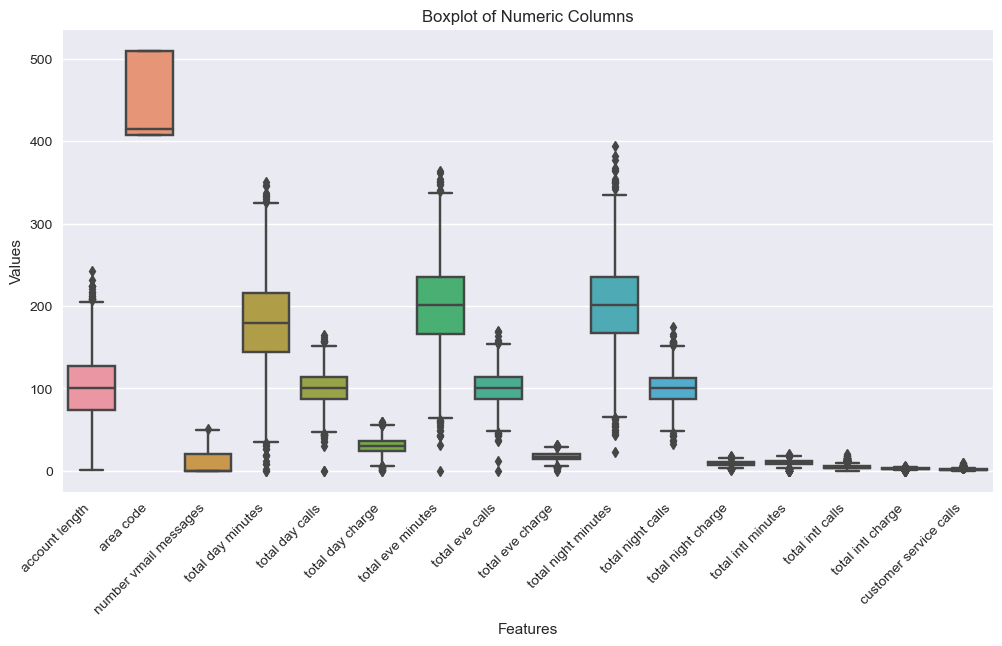

In [5]:
# Plotting a boxplot to check for outliers
features_to_plot = data.select_dtypes(include = ['number'])
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

There are outliers present in our dataset. However, we will choose to retain them rather than drop them. This is because they are genuine events that may or may not affect customer churn. 

### Changing column data types.

Based on the information of the dataset columns, we see that we don't need to change the data type of any column. An argument may be made on the `phone number` column but that will make us lose the authenticity of the data, since that is how phone numbers are written in the United States.

With that, we can conclude data preparation and head to Exploratory Data Analysis.

## EXPLORATORY DATA ANALYSIS.

### Univariate Analysis.

We will analyse each column individually. We will begin with the numeric columns and create histograms which will show us the distributions of the features.

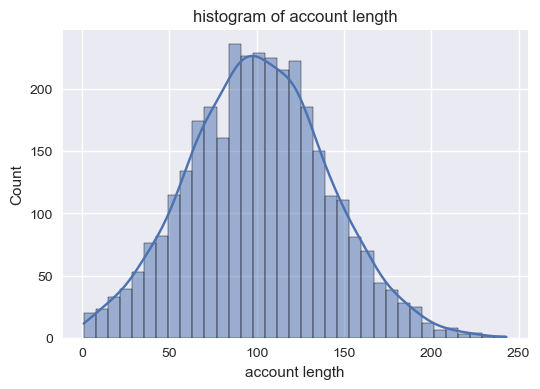

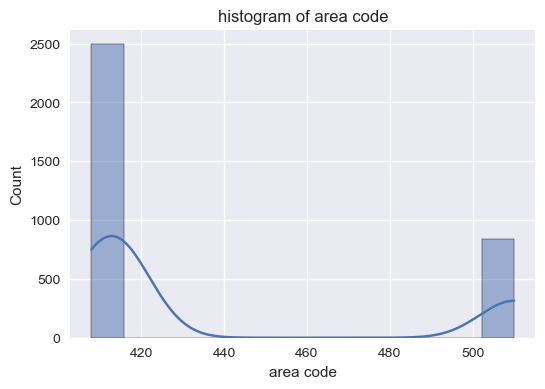

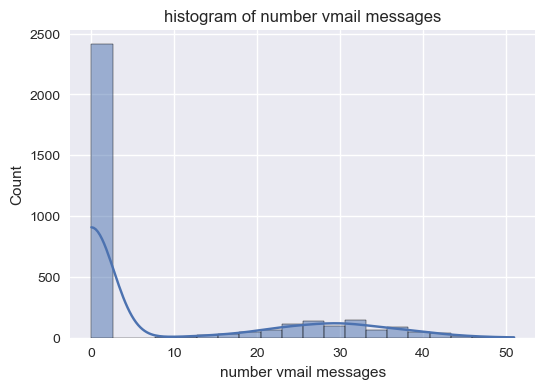

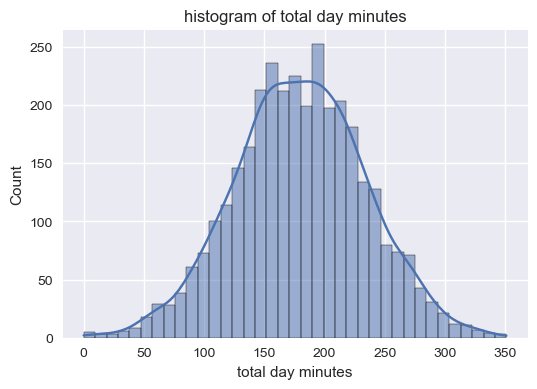

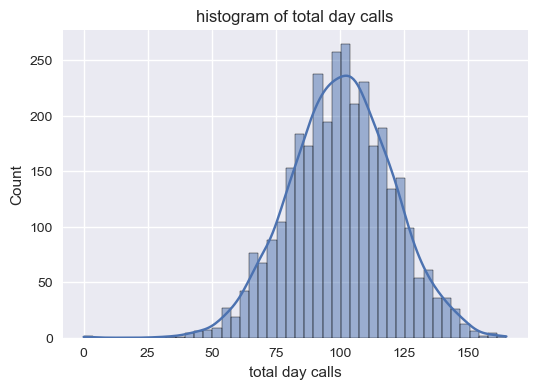

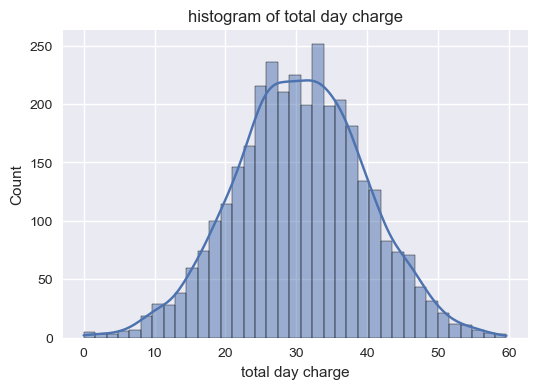

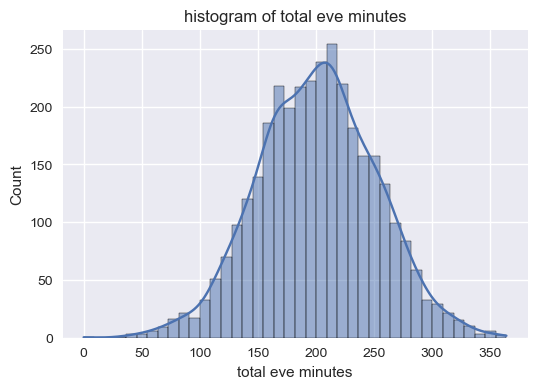

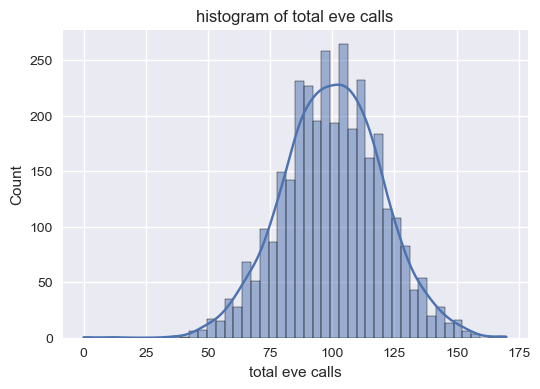

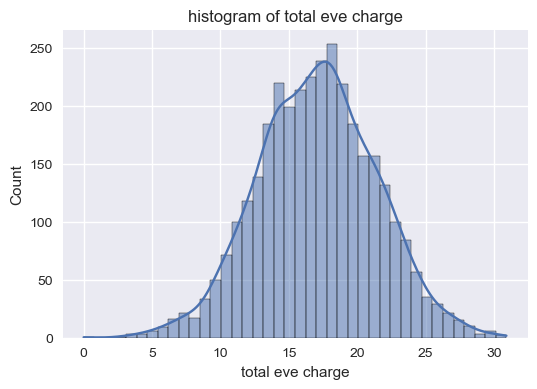

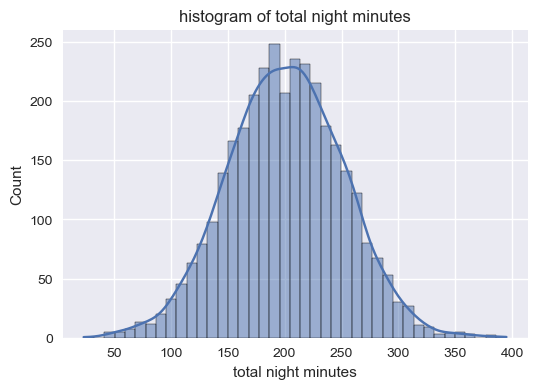

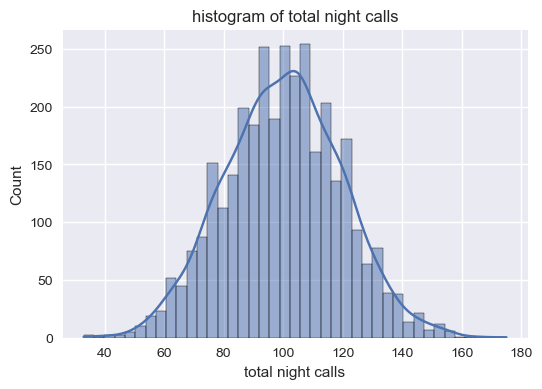

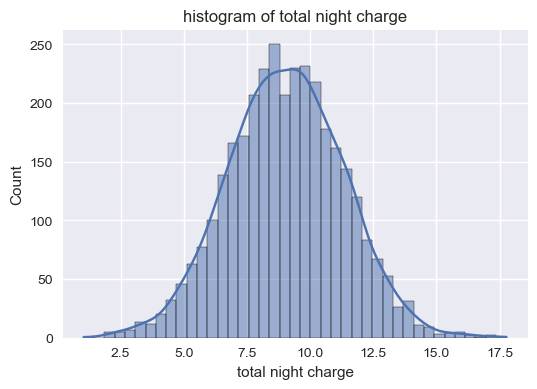

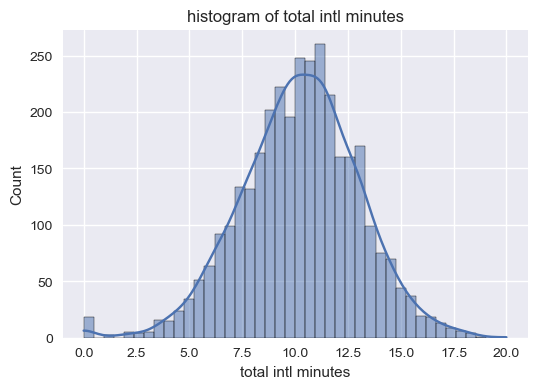

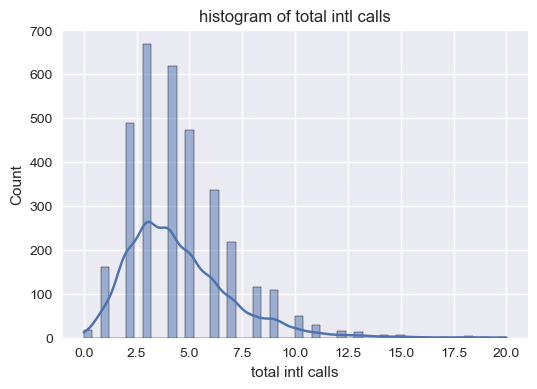

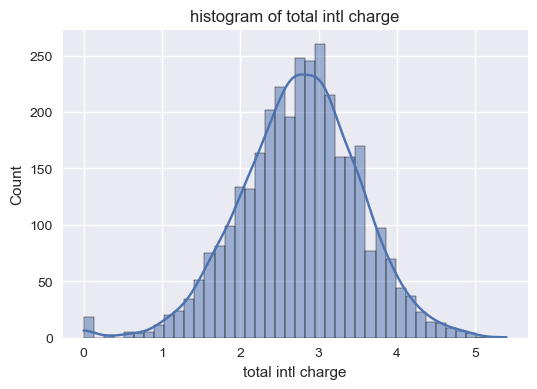

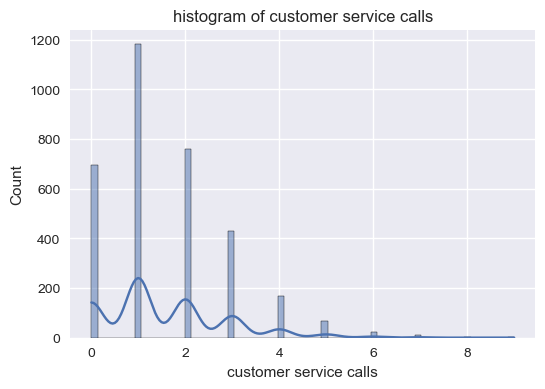

In [6]:
# Creating histograms for selected columns

# Identify numerical columns
numeric_columns = data.select_dtypes(include=['number'])

# Iterate over numerical columns and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_columns, x=column, bins = 'auto', common_norm = False, kde = True)
    plt.title(f"histogram of {column}")
    plt.show()

We can see that most of the columns contain have a normal distribution. We will have to normalize our data in the data preprocessing part for those features without a normal distribution.

We can now check the categorical data. We will check the number of unique values in each column to see the columns we wont use in our models.

In [7]:
# Checking number of unique values in each categorical column.
categorical_columns = data.select_dtypes(include=['object', 'bool'])
for column in categorical_columns.columns:
    print(f'\n{column}\n{data[column].nunique()}')
    if data[column].nunique() == data.shape[0]:
        print(f'{column} is a feature to be dropped.')


state
51

phone number
3333
phone number is a feature to be dropped.

international plan
2

voice mail plan
2

churn
2


We can see the number of the `phone number` is equal to the number of rows in our dataset. This means we will have to drop it during the preprocessing stage. We can create the countplots of the remaining columns.

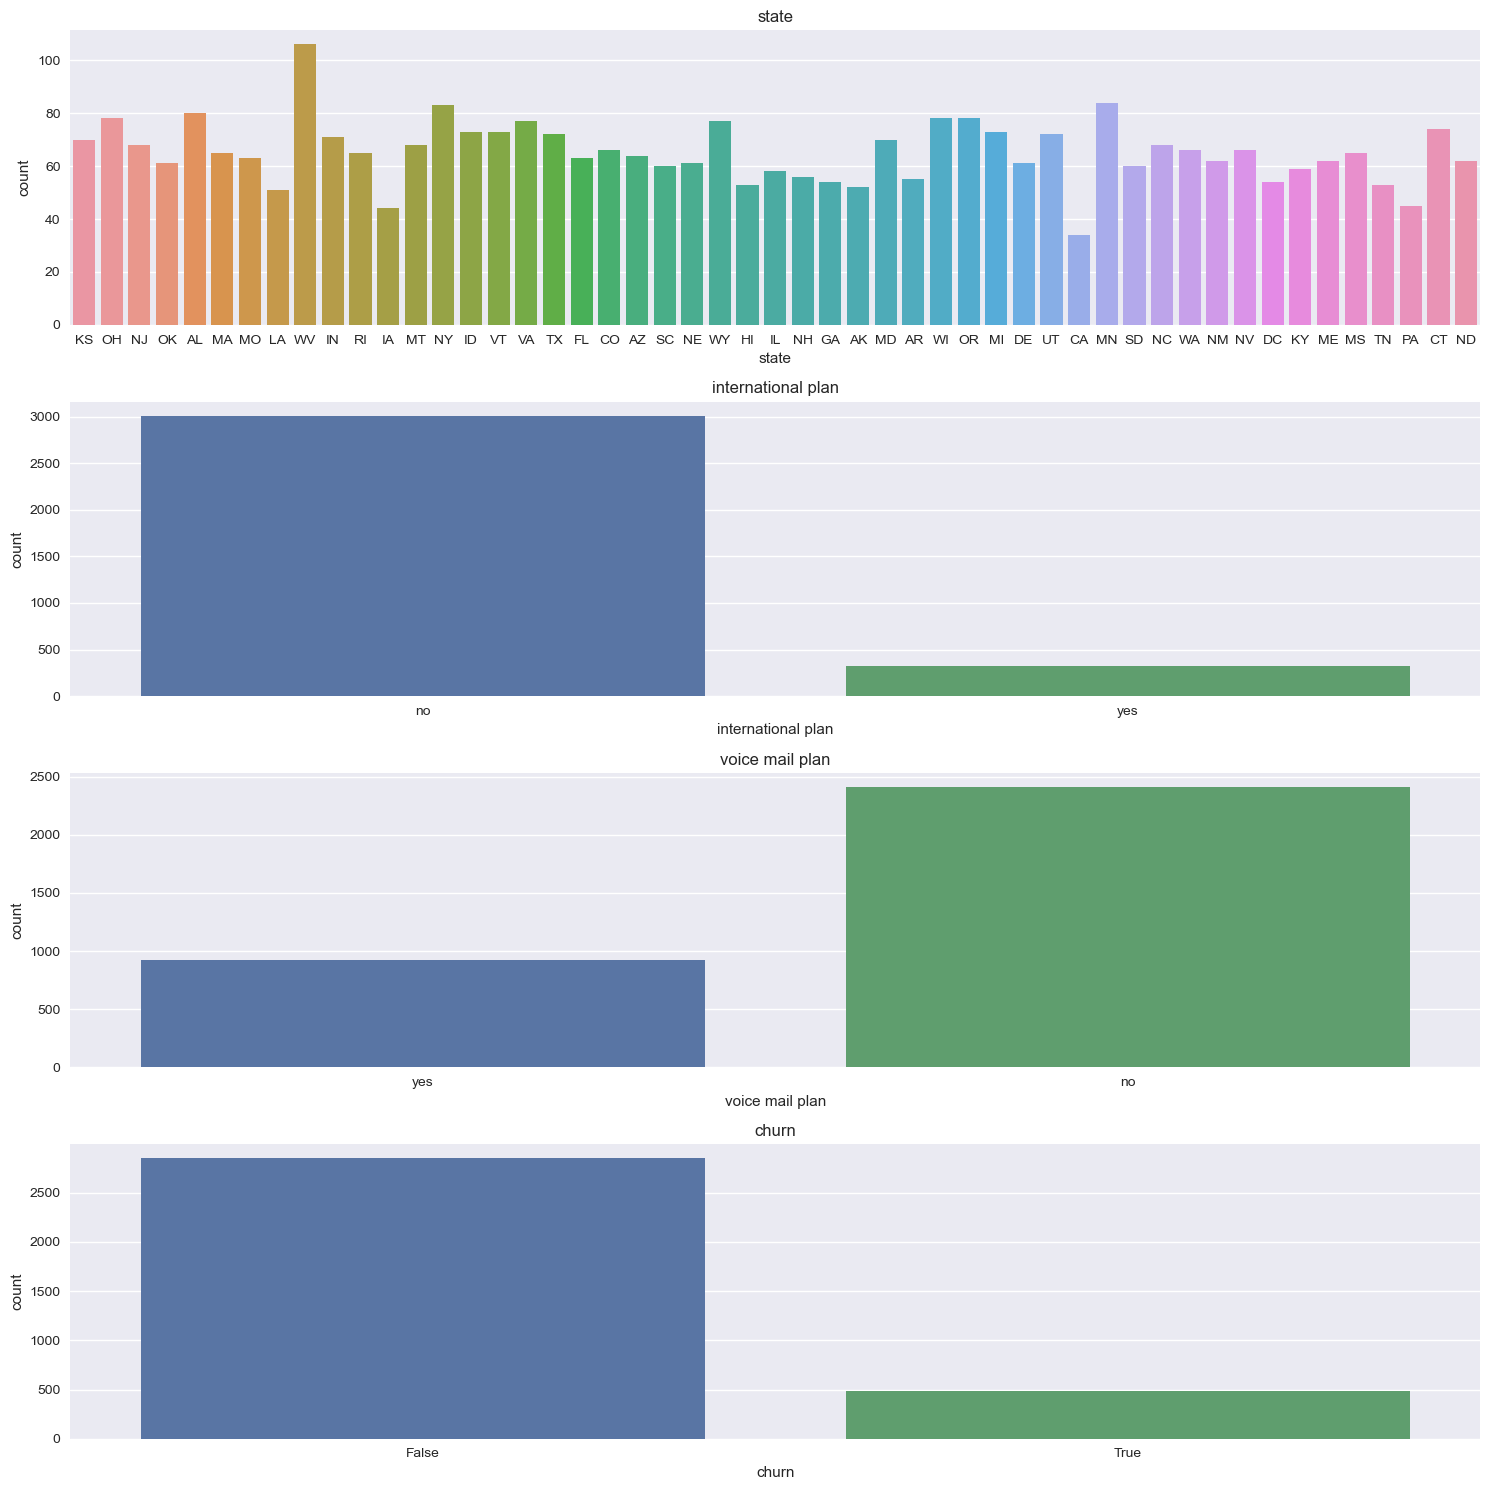

In [8]:
# Dropping the phone number column from the categorical_columns dataframe
categorical_columns = categorical_columns.drop(['phone number'], axis=1).columns

# Creating the countplots
# Create a figure with a grid of subplots
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(15, 15))

# Iterate over categorical columns and create countplots
for i, column in enumerate(categorical_columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)

# Show the plot
plt.tight_layout()
plt.show();

We can see that there are 51 states but we won't drop it. There could be a pattern of where more cases of customer churn is present by state. We will now go to bivariate analysis part.

### Bivariate Analysis.

We will be comparing our features to the target which is the `churn` column. We will begin by comparing the numerical features with the target variable.

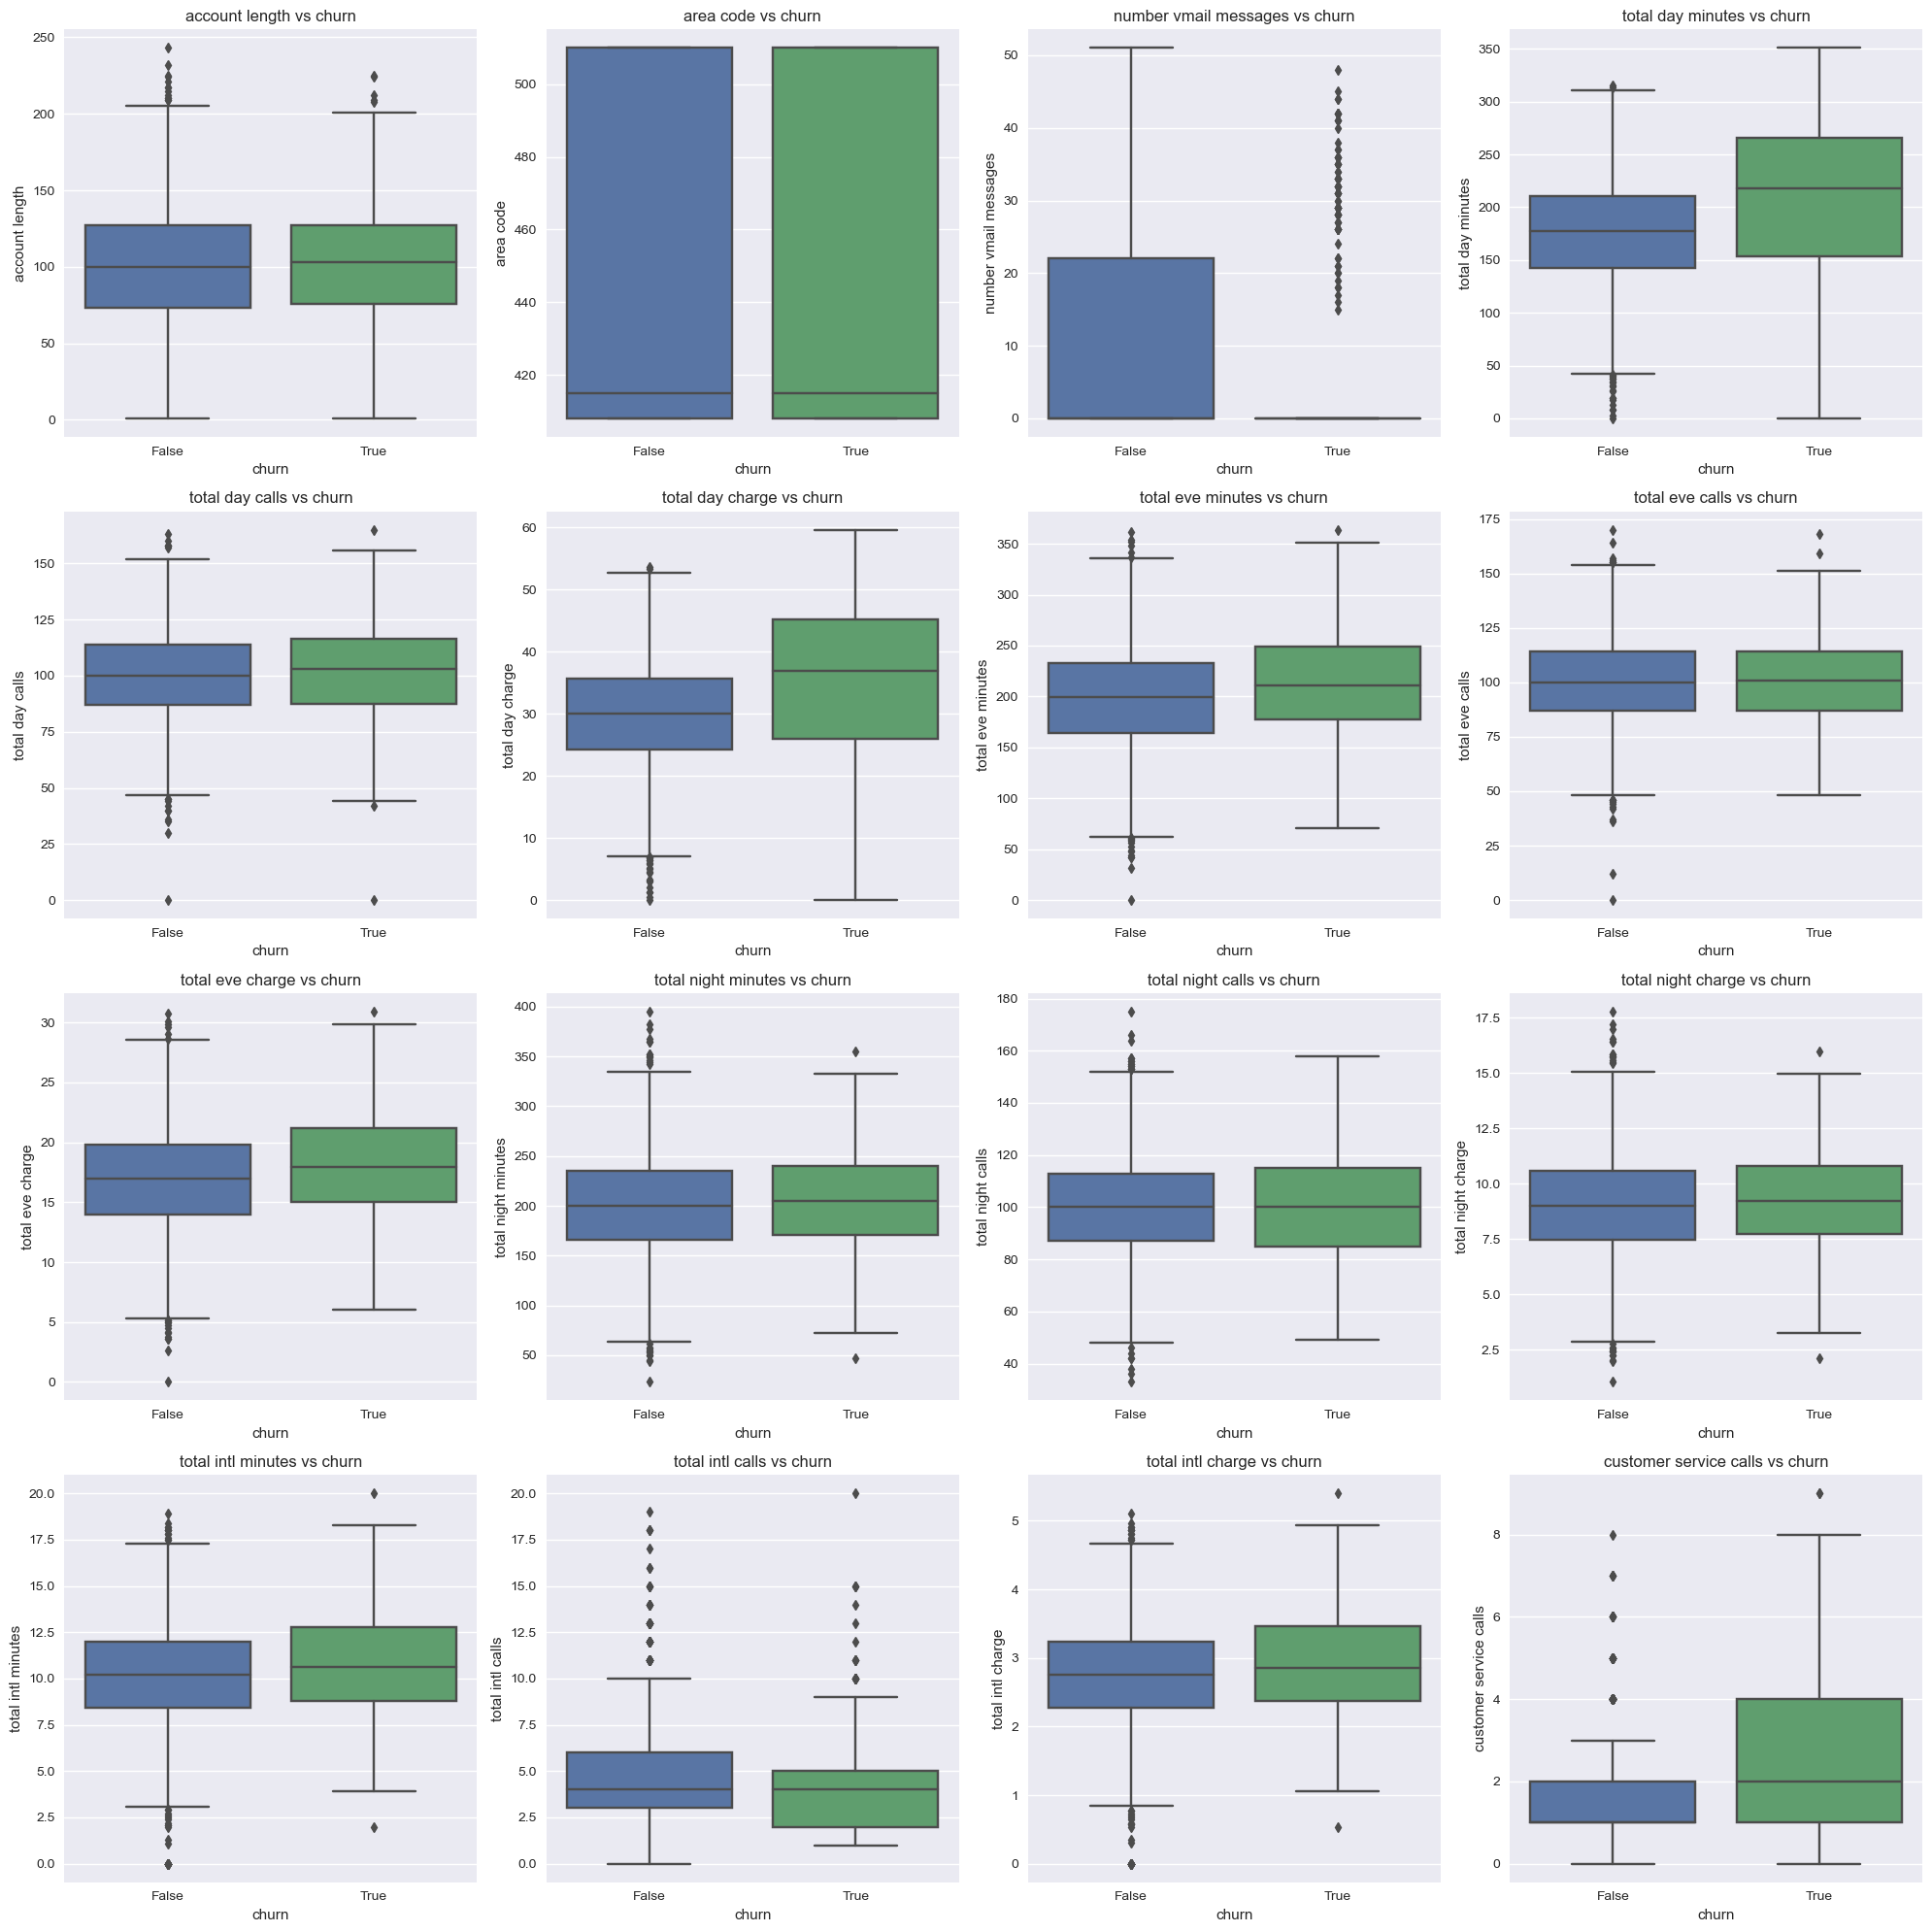

In [13]:
# Selecting the columns to be used in the plot
numeric_columns = data.select_dtypes(include=['number'])

plt.figure(figsize=(20,20))

for i, column in enumerate(numeric_columns):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x='churn', y=column, data=data)
    plt.title(f'{column} vs churn')

plt.tight_layout()
plt.show();

Based on the plots we have created, we can see that `area code` has no pattern on customer churn. That means we will drop it during the preprocessing stage. We can also see that the customers who have churned have made the most customer service calls compared to those who haven't. They also incur a lot of charges during the day due to spending a lot of minutes in their calls. For the other features it seems those who have churned and those who haven't have somewhat similar patterns. We can now create a plot that compares the categorical features with the target.

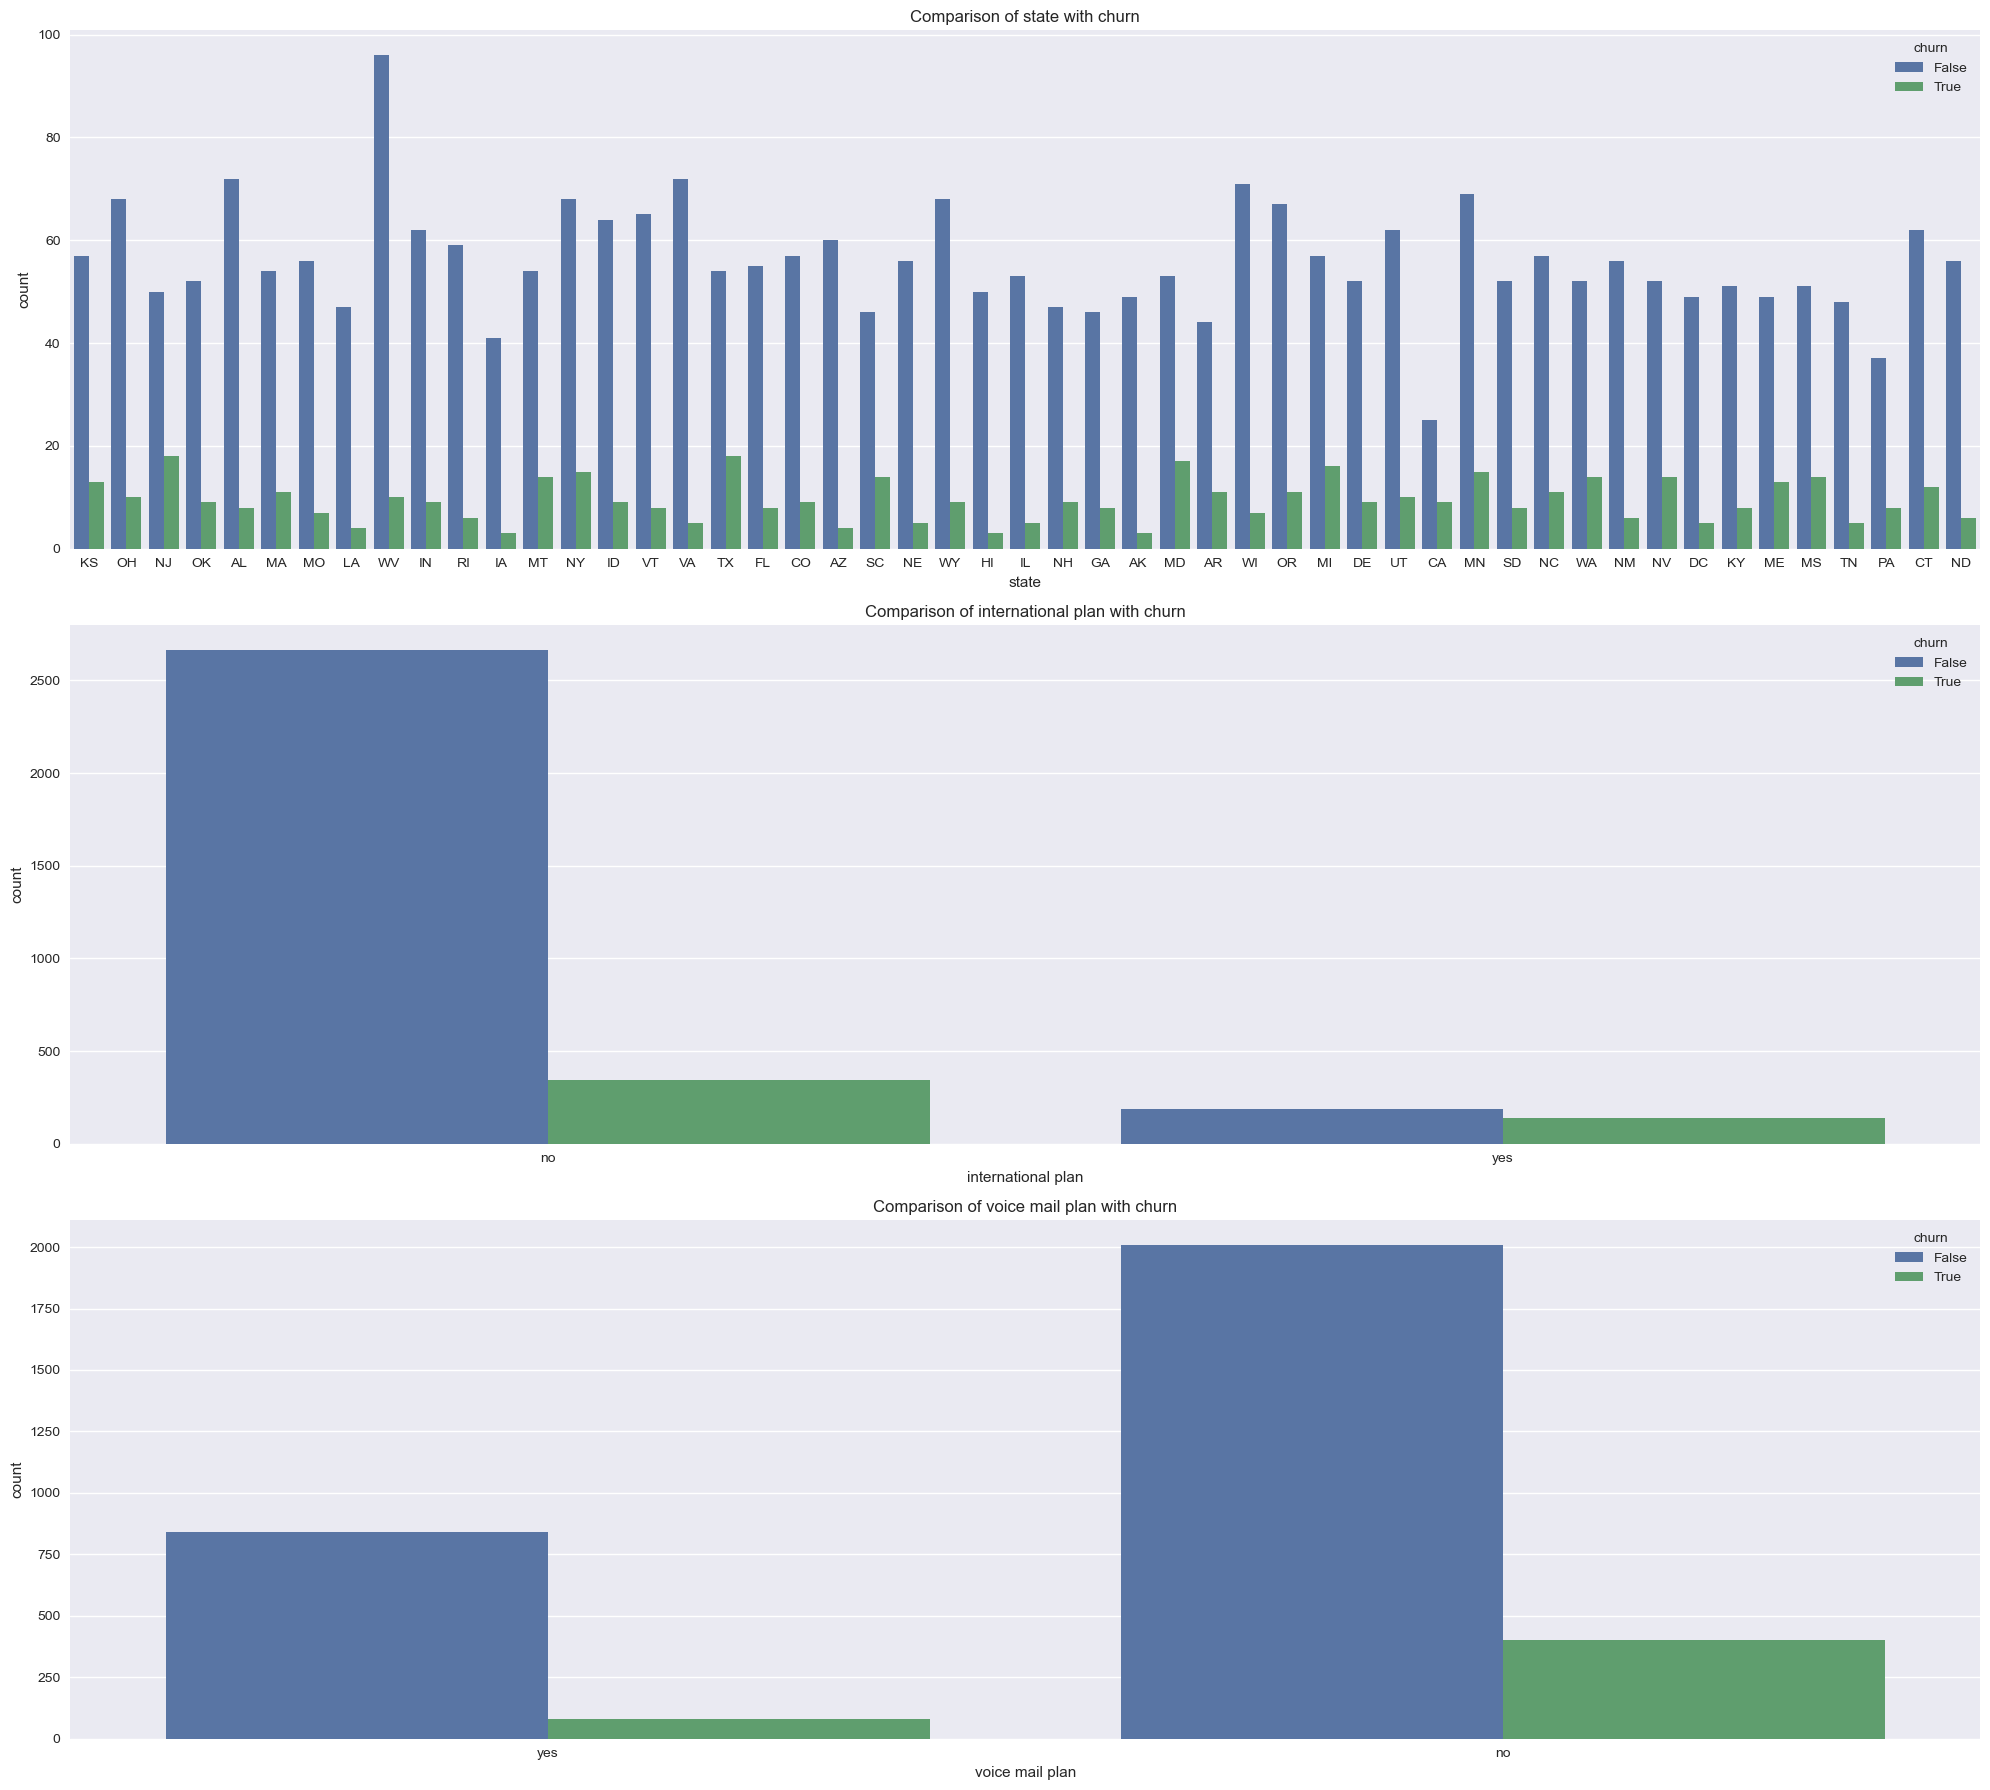

In [16]:
# Dropping the phone number column from the categorical_columns dataframe
categorical_columns = data.select_dtypes(include='object').drop(['phone number'], axis=1).columns

# Plotting the bar graphs

fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(20, 6 * len(categorical_columns)))

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, hue='churn', data=data, ax=axes[i])
    axes[i].set_title(f'Comparison of {column} with churn')

plt.tight_layout()
plt.show();


We notice that there is no pattern in the `state` column whereby the comparison in each state looks similar. That means we will drop the column in the preprocessing stage. We can also see that most of those who stopped using SyriaTel products have subscribed to neither international nor voicemail plans. 

With this analysis, we conclude the bivariate analysis. We can now head to the multivariate analysis.

### Multivariate Analysis.

Here, we will compare the relationship between the numeric columns and see how they correlate with each other. We will use a heatmap to show these correlations.

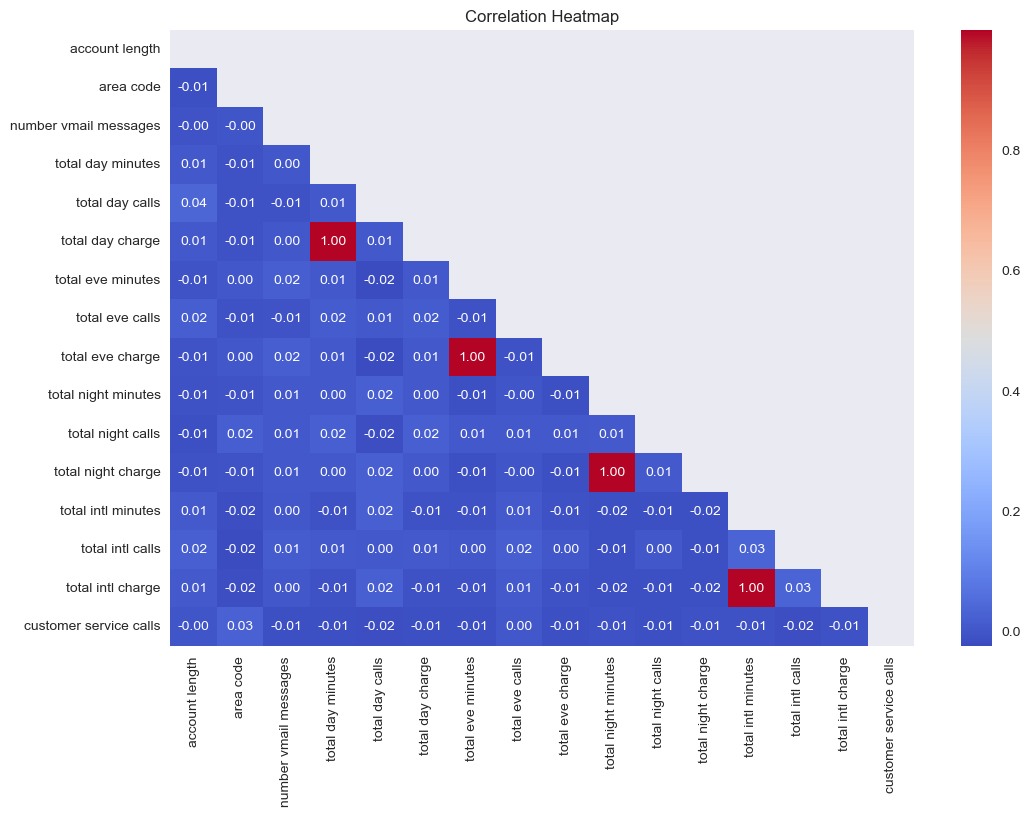

In [17]:
numeric_columns = data.select_dtypes(include=['number'])
# Creating a correlation matrix
correlation_matrix = numeric_columns.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show();

Almost all of them almost have either a weak or no correlation with each other, whether positive or negative. However, regardless of the time, we see a perfect positive correlation between minutes spent on calls and charges incurred. This means that there is no independence between these features and in turn it means we wiil not use any Naive Bayes model which assumes independence of features.

This concludes the Exploratory Data Analysis part and we can now head over to modelling.

## Modelling

In this section we will create different models and choose one which will predict customer churn best using the classification metrics. However, we need to conduct data preprocessing before we create the models.

### Data Preprocessing.

We will begin by doing some feature engineering on our dataset. Since the models only use features which are numerical in nature, we will encode the values in the `international plan` and `voice mail plan` columns. This will be done by creating a function that maps the values. 

In [22]:
# Checking the value counts of the two columns
for column in data[['international plan', 'voice mail plan']]:
    print(f'\n{data[column].value_counts()}')


no     3010
yes     323
Name: international plan, dtype: int64

no     2411
yes     922
Name: voice mail plan, dtype: int64


In [23]:
# Create a mapping function and apply it to the selected columns
def binary_feature(target_value):
    if target_value == 'yes':
        return 1
    else:
        return 0

# Applying the function to the selected columns.
for column in data[['international plan', 'voice mail plan']]:
    data[column] = data[column].apply(binary_feature)
    print(f'\n{data[column].value_counts()}')


0    3010
1     323
Name: international plan, dtype: int64

0    2411
1     922
Name: voice mail plan, dtype: int64


With the feature engineering segment being done we can now head over to the definig of X and y and the splitting of the dataset into training and testing datasets. We will conduct a `70/30` split with a random state of `42` for reproducibility. We will also be dropping the features we had mentioned above in this part.

In [24]:
# Choosing X and y
y = data['churn']
X = data.drop(['churn', 'state', 'area code', 'phone number'], axis=1)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

We will combine the MinMax scaler with the pipelines we will use for modelling. This means that we will now be heading to the creation of the first model which is Logistic Regression.

### 1. Logistic Regression.